<a href="https://colab.research.google.com/github/dhairyachaudhary/ML-Project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries and dataset

In [ ]:
!git clone https://github.com/dhairyachaudhary/ML-Project
!mv ML-Project/train.csv /content
!mv ML-Project/test.csv /content

Cloning into 'ML-Project'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 2), reused 4 (delta 1), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [ ]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import feature_selection, tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeavePGroupsOut
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression
from joblib import dump, load
from sklearn.neural_network import MLPClassifier
import pickle

In [ ]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
# To sample data
# df_ = df.groupby(df['Activity']).sample(986, random_state=0)

Function to save and load models

In [ ]:
!mkdir Model

In [ ]:
def saveModel(model, fileName):
  filePath = '/content/ML-Project/Model/'+fileName
  dump(model, filePath)

def loadModel(fileName):
  filePath = '/content/ML-Project/Model/'+fileName
  return load(filePath)

#Exploratory Data Analysis

**Checking values in dataset**

---





In [ ]:
df.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  ...  subject  Activity
0           0.288585          -0.020294  ...        1  STANDING
1           0.278419          -0.016411  ...        1  STANDING
2           0.279653          -0.019467  ...        1  STANDING
3           0.279174          -0.026201  ...        1  STANDING
4           0.276629          -0.016570  ...        1  STANDING

[5 rows x 563 columns]

In [ ]:
df.describe()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  ...  angle(Z,gravityMean)      subject
count        7352.000000        7352.000000  ...           7352.000000  7352.000000
mean            0.274488          -0.017695  ...             -0.056515    17.413085
std             0.070261           0.040811  ...              0.279122     8.975143
min            -1.000000          -1.000000  ...             -1.000000     1.000000
25%             0.262975          -0.024863  ...             -0.143414     8.000000
50%             0.277193          -0.017219  ...              0.003181    19.000000
75%             0.288461          -0.010783  ...              0.107659    26.000000
max             1.000000           1.000000  ...              1.000000    30.000000

[8 rows x 562 columns]

**Checking datatype of attributes**

In [ ]:
print(df.dtypes)

tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
Length: 563, dtype: object


**Checking for duplicate values**

In [ ]:
print(df.duplicated().sum())

0


**Checking for null values**

---



In [ ]:
print(df.isna().sum())

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64


**Checking spread of data across different subjects**

---



In [ ]:
df['subject'].groupby(df['subject']).count()

subject
1     347
3     341
5     302
6     325
7     308
8     281
11    316
14    323
15    328
16    366
17    368
19    360
21    408
22    321
23    372
25    409
26    392
27    376
28    382
29    344
30    383
Name: subject, dtype: int64

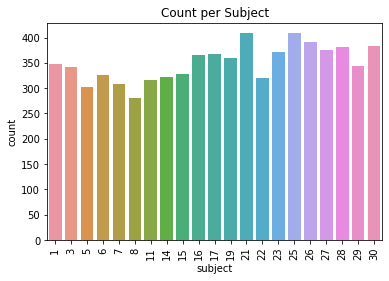

In [ ]:
# to ensure that the data is not biased towards some subjects

plt.title('Count per Subject')
sns.countplot(x = df.subject)
plt.xticks(rotation=90)
plt.show()

**Checking spread of data across different activities**

---





In [ ]:
# to check if data of different classes is balanced

df['Activity'].groupby(df['Activity']).count()

Activity
LAYING                1407
SITTING               1286
STANDING              1374
WALKING               1226
WALKING_DOWNSTAIRS     986
WALKING_UPSTAIRS      1073
Name: Activity, dtype: int64

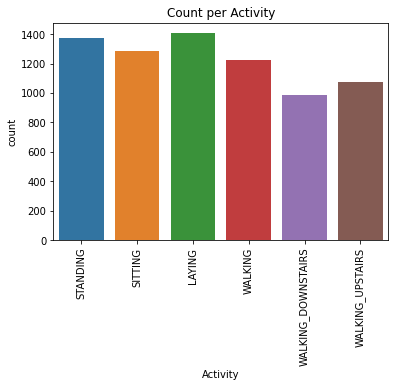

In [ ]:
plt.title('Count per Activity')
sns.countplot(x = df.Activity)
plt.xticks(rotation=90)
plt.show()

**Plotting data per user by activity**

---



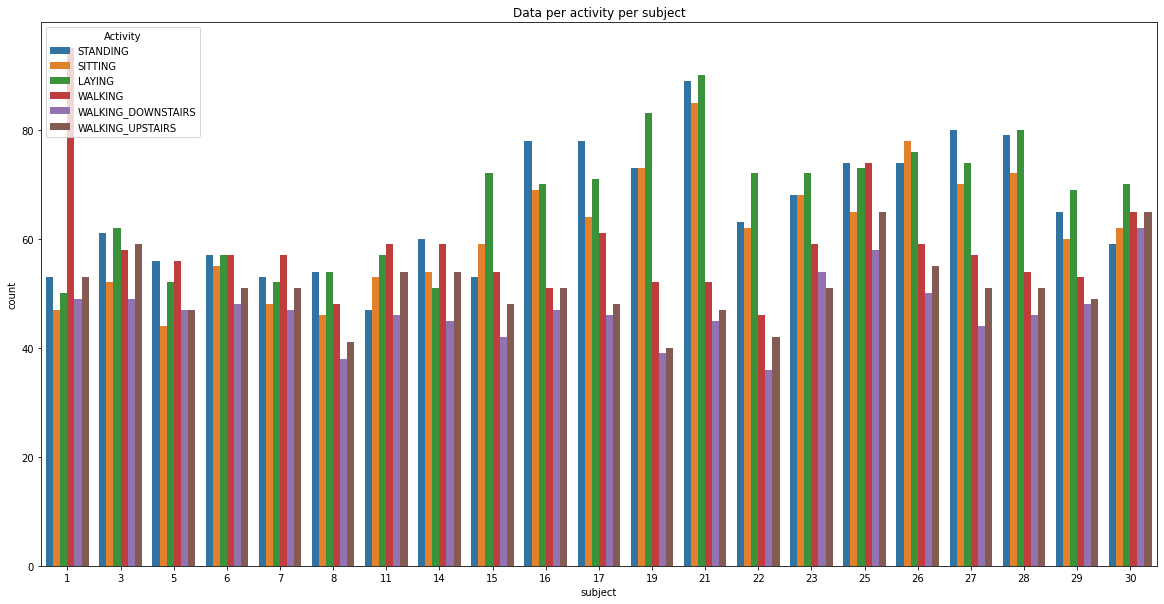

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Data per activity per subject')
sns.countplot(x='subject',hue='Activity', data = df)
plt.show()

**Acceleration Magnitude Mean for Different Activities**

---






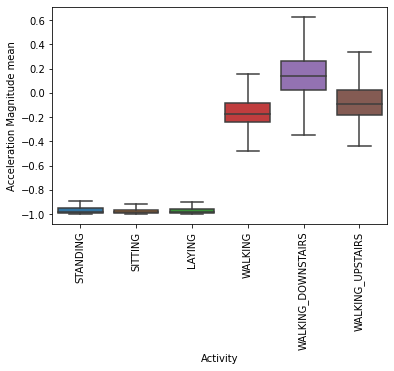

In [ ]:
# visualising the difference in the mean acceleration of static vs dynamic activities

sns.boxplot(x='Activity', y='tBodyAccMag-mean()',data=df,showfliers=False)
plt.ylabel('Acceleration Magnitude mean')
plt.xticks(rotation=90)
plt.show()

**Gravitational Acceleration Mean for Different Activities**

---

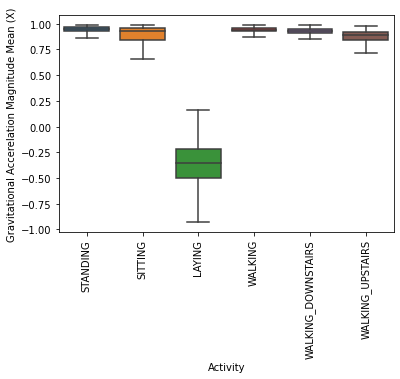

In [ ]:
sns.boxplot(x='Activity', y='tGravityAcc-mean()-X',data=df,showfliers=False)
plt.ylabel('Gravitational Accerelation Magnitude Mean (X)')
plt.xticks(rotation=90)
plt.show()

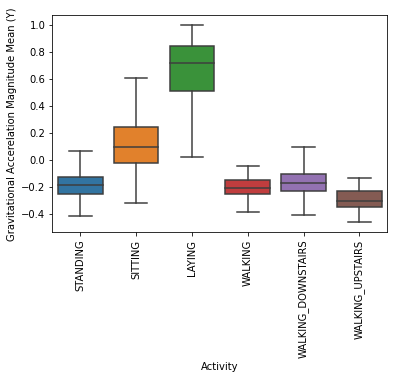

In [ ]:
sns.boxplot(x='Activity', y='tGravityAcc-mean()-Y',data=df,showfliers=False)
plt.ylabel('Gravitational Accerelation Magnitude Mean (Y)')
plt.xticks(rotation=90)
plt.show()

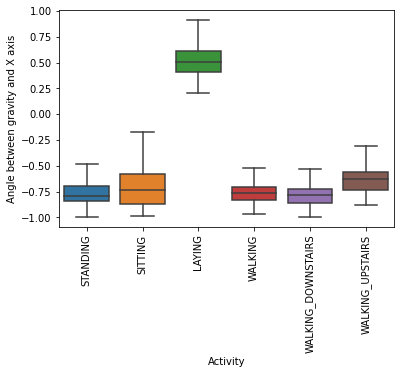

In [ ]:
sns.boxplot(x='Activity', y='angle(X,gravityMean)',data=df,showfliers=False)
plt.ylabel('Angle between gravity and X axis')
plt.xticks(rotation=90)
plt.show()

**Analysis of Features**

In [ ]:
# Select features

# 1 tBodyAcc-mean()-X
# 2 tBodyAcc-mean()-Y
# 3 tBodyAcc-mean()-Z
# 41 tGravityAcc-mean()-X
# 42 tGravityAcc-mean()-Y
# 43 tGravityAcc-mean()-Z
# 121 tBodyGyro-mean()-X
# 122 tBodyGyro-mean()-Y
# 123 tBodyGyro-mean()-Z
# 559 angle(X,gravityMean)
# 560 angle(Y,gravityMean)
# 561 angle(Z,gravityMean)

Observing Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


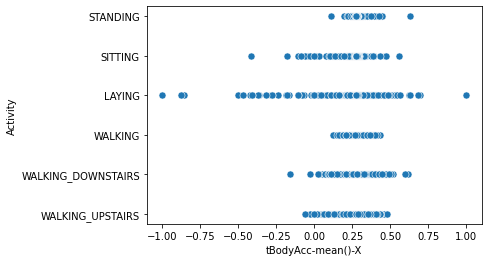

In [ ]:
sns.scatterplot(df['tBodyAcc-mean()-X'],df['Activity'],s=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


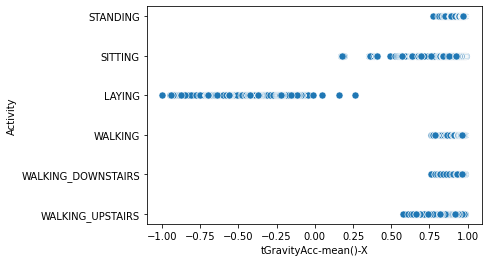

In [ ]:
sns.scatterplot(df['tGravityAcc-mean()-X'],df['Activity'],s=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


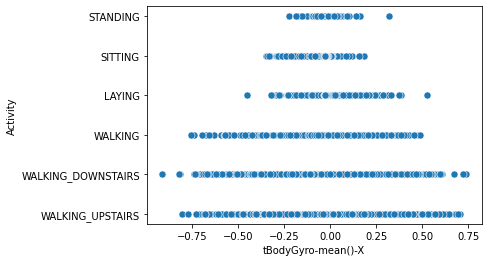

In [ ]:
sns.scatterplot(df['tBodyGyro-mean()-X'],df['Activity'],s=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


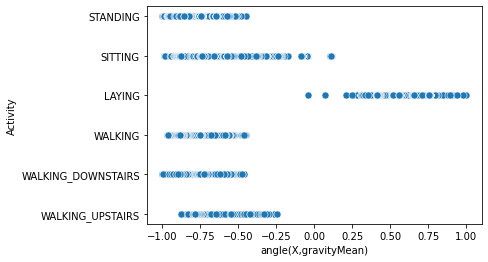

In [ ]:
sns.scatterplot(df['angle(X,gravityMean)'],df['Activity'],s=50)

Correlation between features

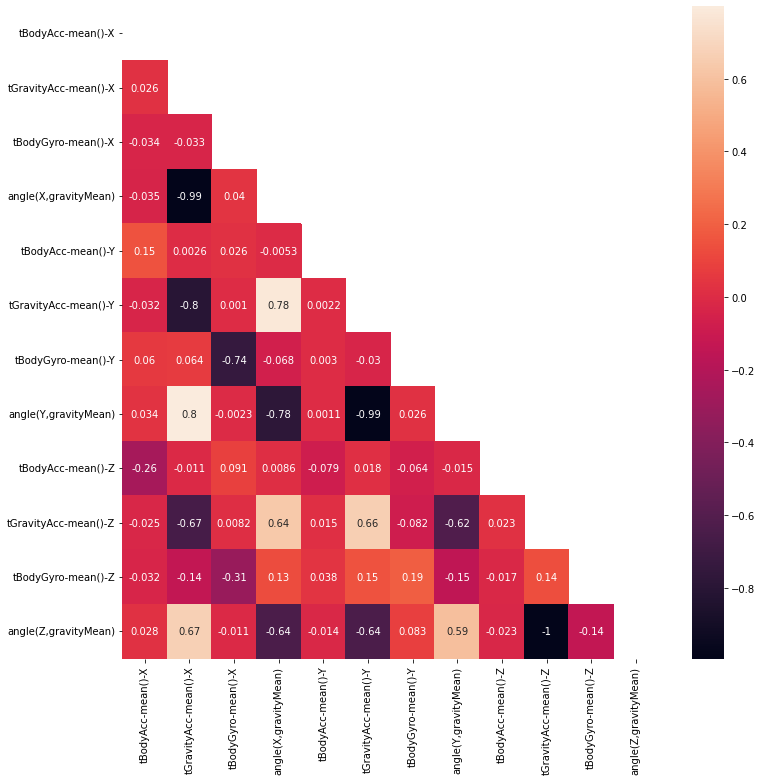

In [ ]:
# observing the correlation between the selected features

df_select = df[['tBodyAcc-mean()-X', 'tGravityAcc-mean()-X', 'tBodyGyro-mean()-X', 'angle(X,gravityMean)', 'tBodyAcc-mean()-Y', 'tGravityAcc-mean()-Y', 'tBodyGyro-mean()-Y', 'angle(Y,gravityMean)', 'tBodyAcc-mean()-Z', 'tGravityAcc-mean()-Z', 'tBodyGyro-mean()-Z', 'angle(Z,gravityMean)']]
corr = df_select.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, mask = np.triu(np.ones_like(corr, dtype=bool)))

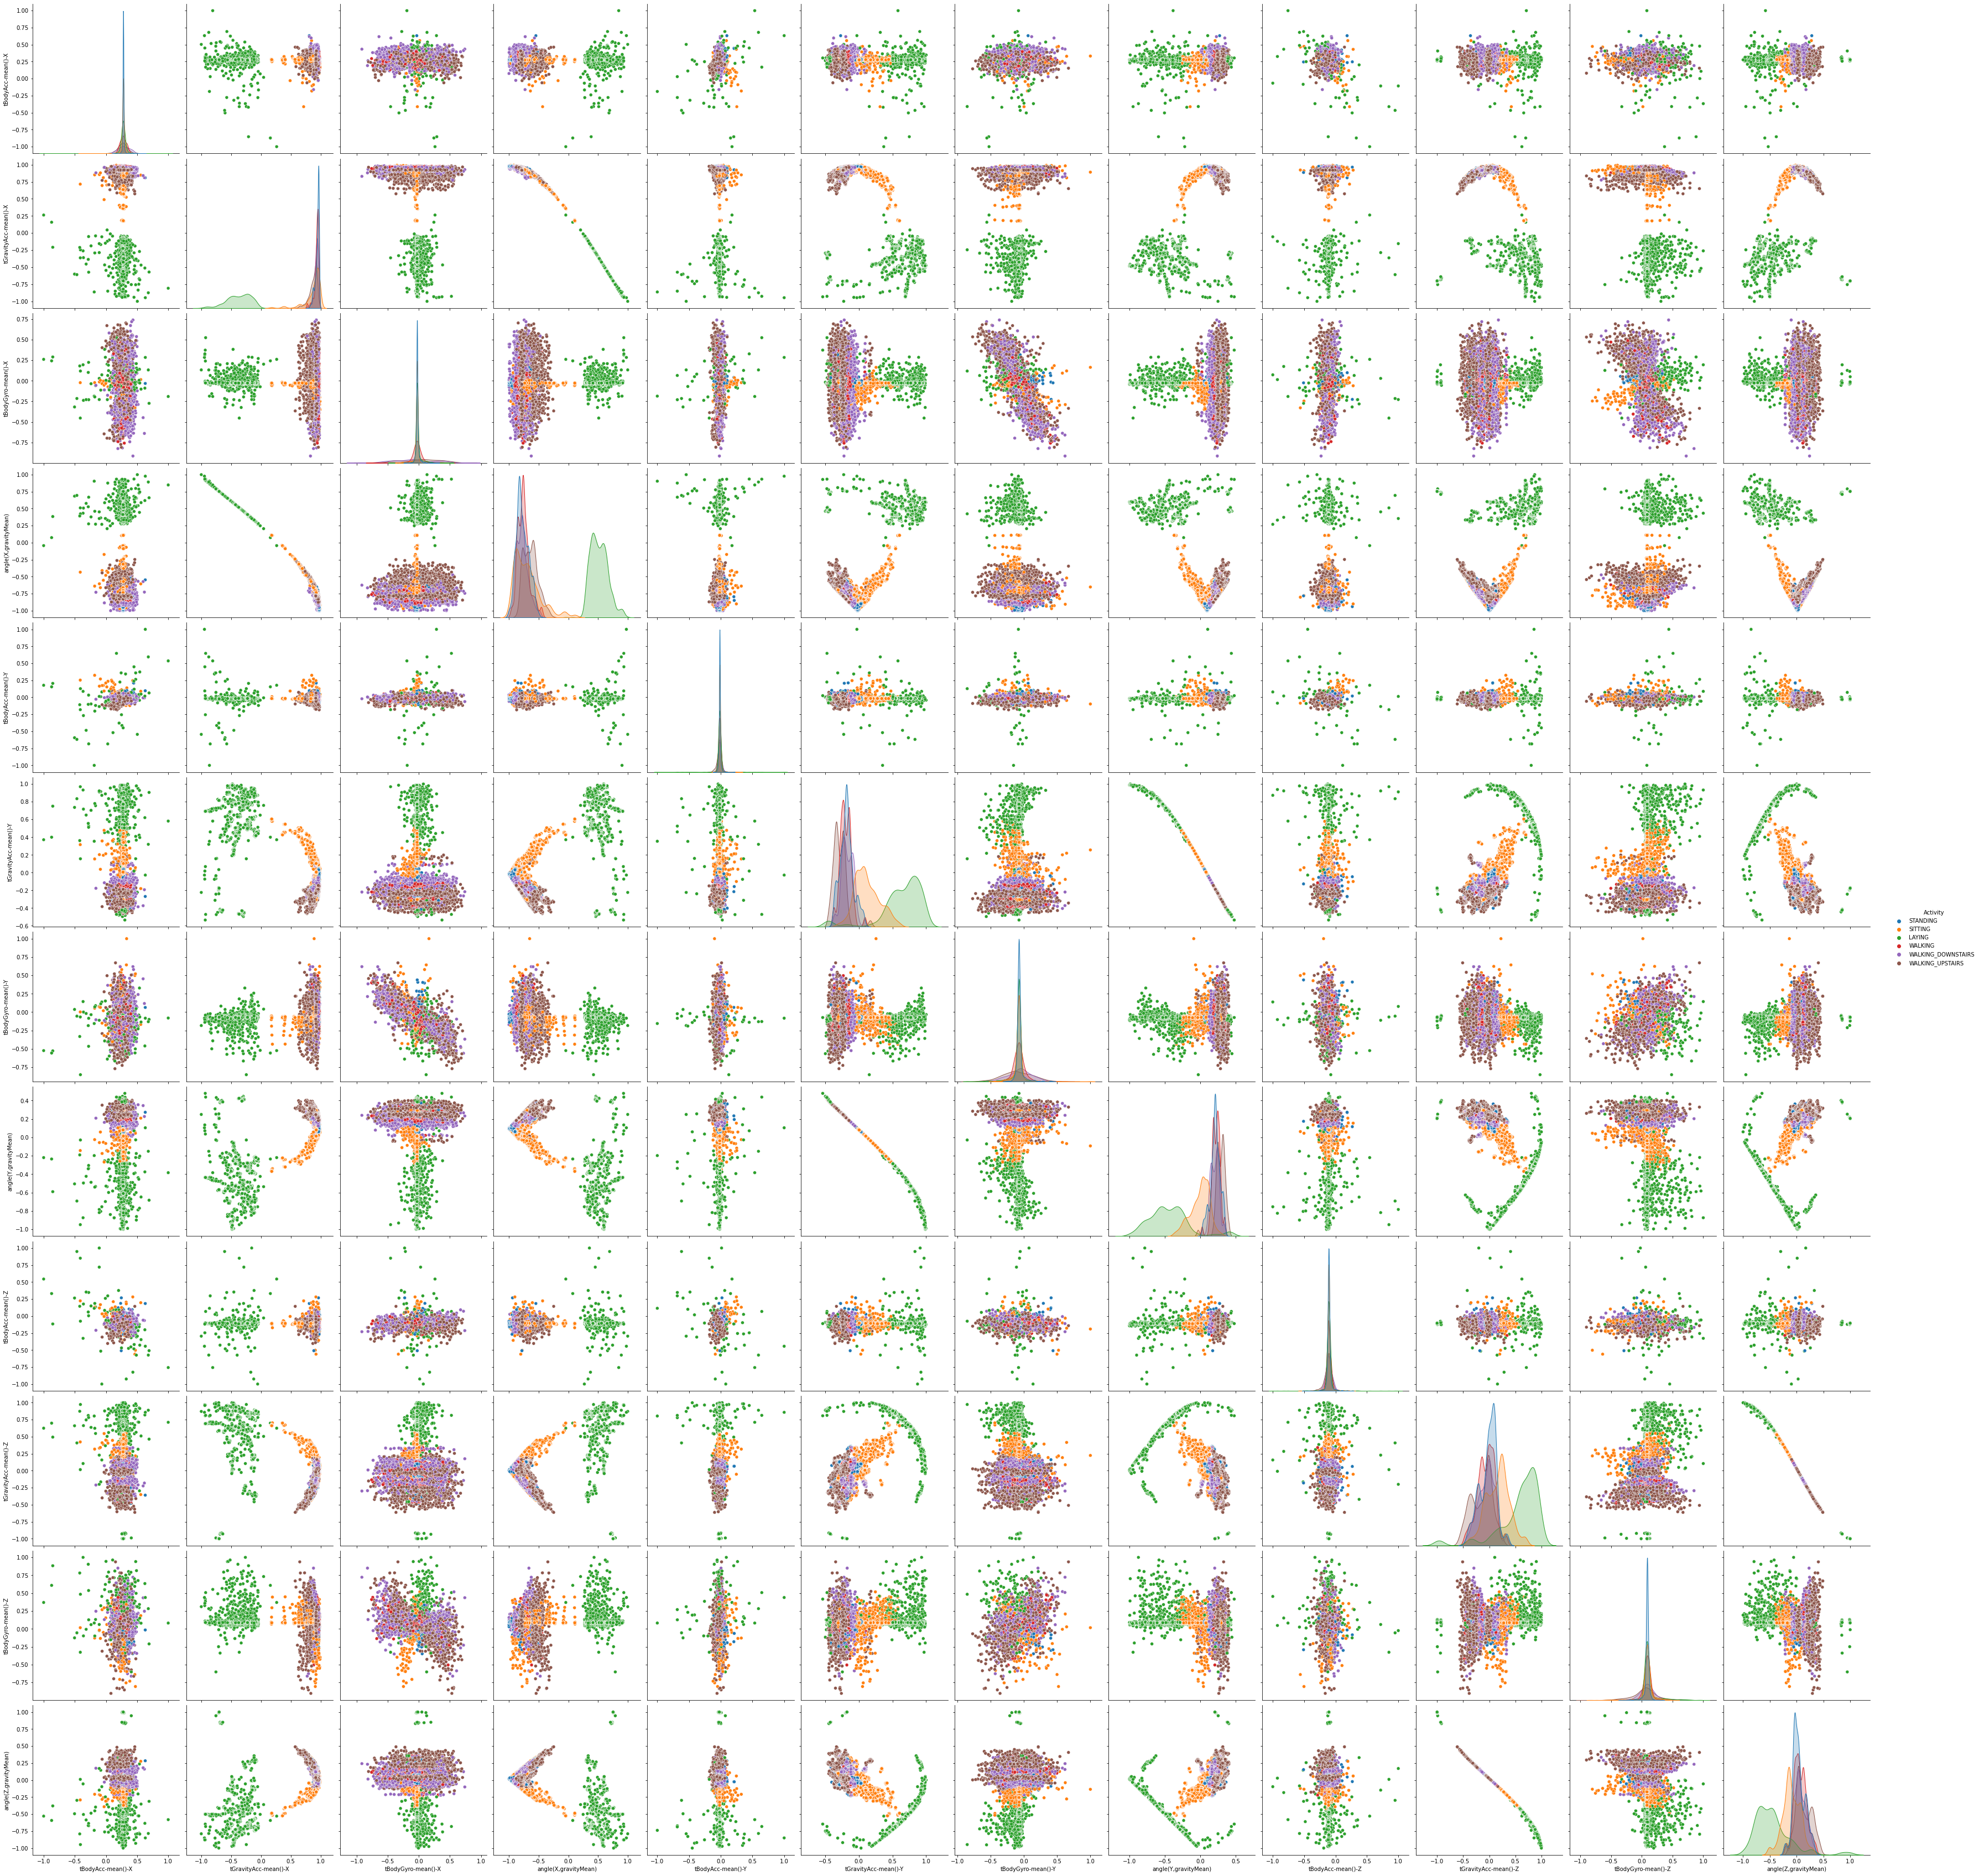

In [ ]:
df_select = df[['tBodyAcc-mean()-X', 'tGravityAcc-mean()-X', 'tBodyGyro-mean()-X', 'angle(X,gravityMean)', 'tBodyAcc-mean()-Y', 'tGravityAcc-mean()-Y', 'tBodyGyro-mean()-Y', 'angle(Y,gravityMean)', 'tBodyAcc-mean()-Z', 'tGravityAcc-mean()-Z', 'tBodyGyro-mean()-Z', 'angle(Z,gravityMean)', 'Activity']]
sns.pairplot(df_select,hue='Activity',height=4)

# Feature Selection

In [ ]:
x_train = df.drop(columns=['Activity','subject'])
y_train = df.Activity
x_test = df_test.drop(columns = ['Activity', 'subject'])
y_test = df_test.Activity

##SelectKBest

In [ ]:
select_features = feature_selection.SelectKBest(feature_selection.f_classif, k=561).fit(x_train, y_train)
select_features_df = pd.DataFrame({'Feature':list(x_train.columns), 'Scores':select_features.scores_})
select_features_df.sort_values(by='Scores', ascending=False).iloc[:20]

Feature        Scores
366       fBodyAccJerk-entropy()-X  36918.103883
40            tGravityAcc-mean()-X  29362.642369
52             tGravityAcc-min()-X  28175.402833
367       fBodyAccJerk-entropy()-Y  28115.915817
49             tGravityAcc-max()-X  26686.804095
56          tGravityAcc-energy()-X  25981.558817
523  fBodyBodyAccJerkMag-entropy()  23619.245704
234      tBodyAccJerkMag-entropy()  23437.114915
287           fBodyAcc-entropy()-X  23221.614156
102       tBodyAccJerk-entropy()-X  22267.085935
9                 tBodyAcc-max()-X  20276.388628
368       fBodyAccJerk-entropy()-Z  18959.058628
104       tBodyAccJerk-entropy()-Z  18686.064500
103       tBodyAccJerk-entropy()-Y  18294.206453
271               fBodyAcc-mad()-X  18276.433019
3                 tBodyAcc-std()-X  18213.463107
558           angle(X,gravityMean)  18109.846403
280                 fBodyAcc-sma()  17582.916248
15                  tBodyAcc-sma()  16695.040032
268               fBodyAcc-std()-X  16689.489574

In [ ]:
feature_selector = feature_selection.SelectKBest(feature_selection.f_classif, k=120)
x_train = feature_selector.fit_transform(x_train, y_train)
x_test = feature_selector.transform(x_test)
print(x_train.shape, x_test.shape)

(7352, 120) (2947, 120)


##PCA

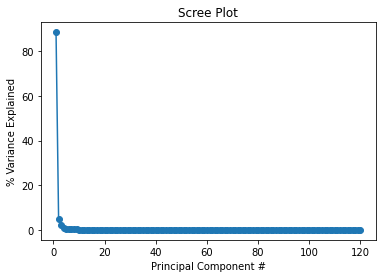


Total Variance Explained: 99.99999999999999 %


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=120)
pca_fit = pca.fit(x_train)

pc_values = np.arange(pca.n_components_) + 1
plt.plot(pc_values, pca.explained_variance_ratio_ * 100, 'o-')
plt.title('Scree Plot')
plt.xlabel('Principal Component #')
plt.ylabel('% Variance Explained')
plt.show()

print('\nTotal Variance Explained:', sum(pca.explained_variance_ratio_) * 100, '%')

In [ ]:
feature_selector = PCA(120, random_state=0)
x_train = feature_selector.fit_transform(x_train)
x_test = feature_selector.transform(x_test)

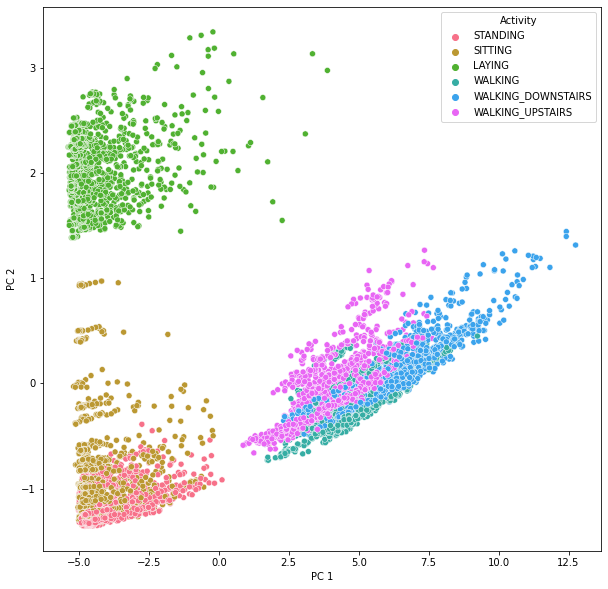

In [ ]:
pca_plot_df = pd.DataFrame(data=x_train[:,0:2], columns=['PC 1', 'PC 2'])
pca_plot_df = pd.concat([pca_plot_df, df.Activity], axis=1)

plt.figure(figsize = (10,10))
sns.scatterplot(x = pca_plot_df['PC 1'], y = pca_plot_df['PC 2'], hue = pca_plot_df['Activity'],  palette = sns.color_palette("husl", len(set(df.Activity))))
plt.show()

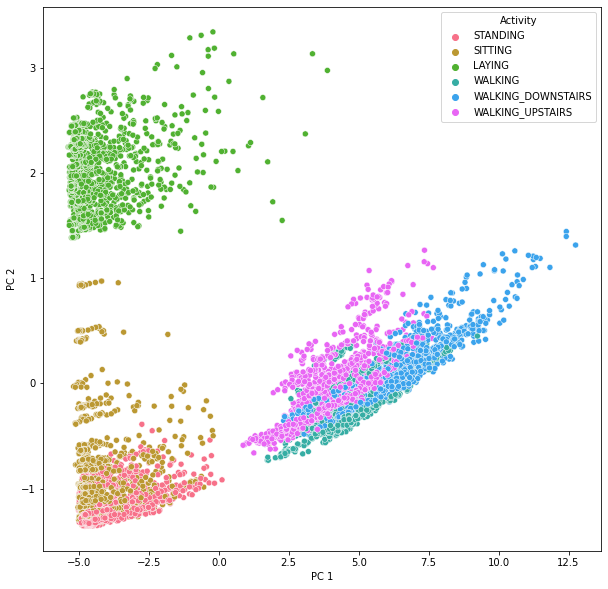

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

pca_plot_selector = PCA(2)
x_train_pca_plot = pca_plot_selector.fit_transform(x_train)
pca_plot_df = pd.DataFrame(data=x_train_pca_plot, columns=['PC 1', 'PC 2'])
pca_plot_df = pd.concat([pca_plot_df, df.Activity], axis=1)

plt.figure(figsize = (10,10))
sns.scatterplot(x = pca_plot_df['PC 1'], y = pca_plot_df['PC 2'], hue = pca_plot_df['Activity'],  palette = sns.color_palette("husl", len(set(df.Activity))))
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.002s...
[t-SNE] Computed neighbors for 7352 samples in 1.258s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.218113
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.557426
[t-SNE] KL divergence after 1000 iterations: 1.073396


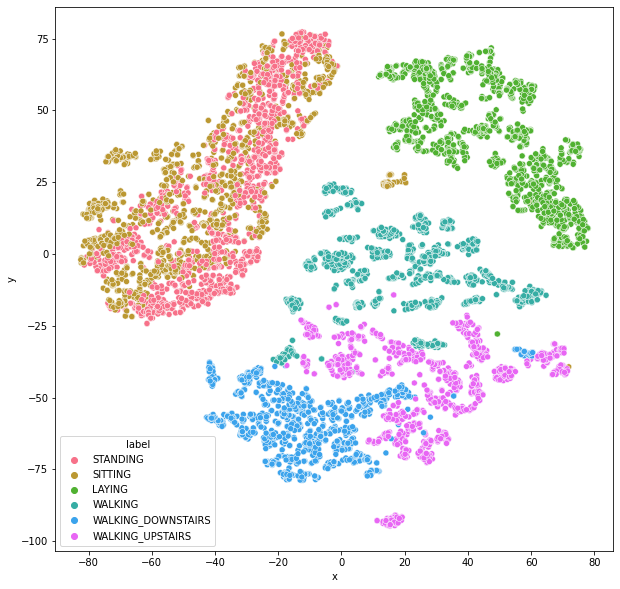

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import manifold

tsne = manifold.TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1).fit_transform(x_train)

df_tsne= pd.DataFrame(columns = ["x", "y", "label"] )
df_tsne["x"] = tsne[:,0]
df_tsne["y"] = tsne[:,1]
df_tsne["label"] = y_train

plt.figure(figsize = (10,10))
sns.scatterplot(x = df_tsne["x"], y = df_tsne["y"], hue = df_tsne["label"],  palette = sns.color_palette("husl", len(set(y_train))))
plt.show()

#Naive Bayes

---



In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(x_test)
y_pred

array(['STANDING', 'STANDING', 'STANDING', ..., 'WALKING_UPSTAIRS',
       'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS'], dtype='<U18')

In [ ]:
print(accuracy_score(y_test, y_pred))

0.7702748557855447


In [ ]:
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       0.96      0.60      0.74       537
           SITTING       0.58      0.75      0.65       491
          STANDING       0.80      0.86      0.83       532
           WALKING       0.82      0.84      0.83       496
WALKING_DOWNSTAIRS       0.83      0.61      0.70       420
  WALKING_UPSTAIRS       0.76      0.96      0.84       471

          accuracy                           0.77      2947
         macro avg       0.79      0.77      0.77      2947
      weighted avg       0.79      0.77      0.77      2947



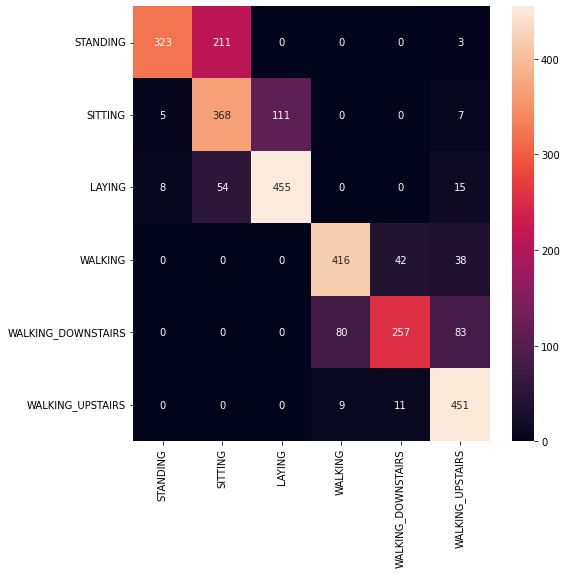

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cf_matrix, annot=True, xticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], yticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], fmt='g')

In [ ]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid = param_grid_nb, cv = 5)
nbModel_grid.fit(x_train, y_train)
print(nbModel_grid.best_estimator_)

GaussianNB(var_smoothing=0.1873817422860384)


In [ ]:
gnb_tuned = GaussianNB(var_smoothing = 0.0003511191734215131)
gnb_tuned.fit(x_train, y_train)
y_pred = gnb_tuned.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8225313878520529
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.52      0.67       491
          STANDING       0.69      0.96      0.80       532
           WALKING       0.82      0.84      0.83       496
WALKING_DOWNSTAIRS       0.83      0.61      0.70       420
  WALKING_UPSTAIRS       0.77      0.96      0.85       471

          accuracy                           0.82      2947
         macro avg       0.84      0.81      0.81      2947
      weighted avg       0.85      0.82      0.81      2947



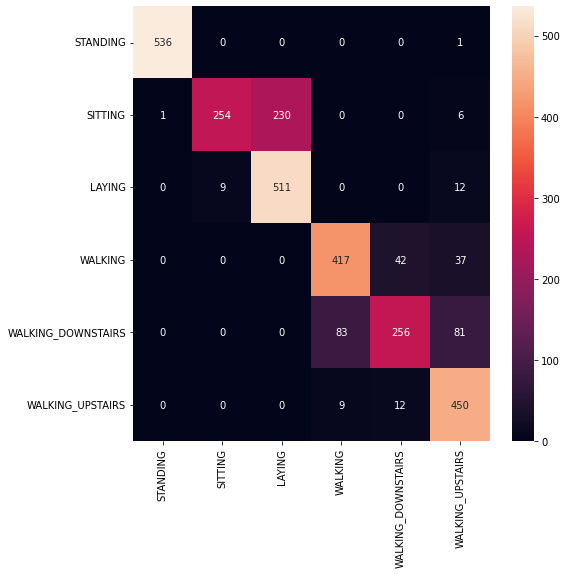

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cf_matrix, annot=True, xticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], yticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], fmt='g')

In [ ]:
# saveModel(gnb_tuned, 'gnb.joblib')

FileNotFoundError: ignored

# Decision Trees

###Hyperparameter Tuning


####Validation Curves

In [ ]:
from sklearn import tree
from sklearn.model_selection import LeavePGroupsOut
from sklearn.model_selection import validation_curve

def plotDoubleLineGraph(x, y1, y2, label1='Training Score', label2='Validation Score', title="SKLearn Score"):
  plt.plot(x, y1, label = label1, marker='o')
  plt.plot(x, y2, label = label2, marker='o')
  plt.title(title)
  plt.legend()
  plt.show()

class ParameterTuner:
  def __init__(self, X, y, paramDict):
    self.paramDict = paramDict
    self.X=X
    self.y=y
    self.trainScores = []
    self.valScores = []
    self.boundedDT = tree.DecisionTreeClassifier(max_depth=15, min_samples_leaf=5, min_impurity_decrease=0.0001, random_state=0)
    self.unboundedDT = tree.DecisionTreeClassifier(random_state=0)
  
  def calcScores(self, parameterName, parameterRange, model):
    trainScores, valScores = validation_curve(model, self.X, self.y, param_name=parameterName, param_range=parameterRange, cv=5, n_jobs=-1)
    self.trainScores = np.mean(trainScores, axis=1)
    self.valScores = np.mean(valScores, axis=1)
    return
    
  def plotScores(self, parameterName, parameterRange, model):
    self.calcScores(parameterName, parameterRange, model)
    plotDoubleLineGraph(parameterRange, self.trainScores, self.valScores, title=parameterName)
    return
  
  def plotAll(self):
    for parameterName, parameterRange in self.paramDict.items():
      self.plotScores(parameterName, parameterRange, self.unboundedDT)
      # self.plotScores(parameterName, parameterRange, self.boundedDT)
      print()

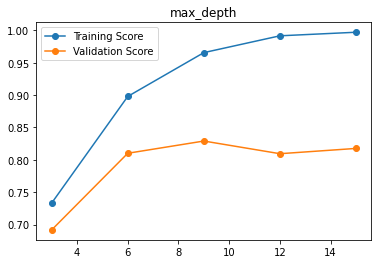

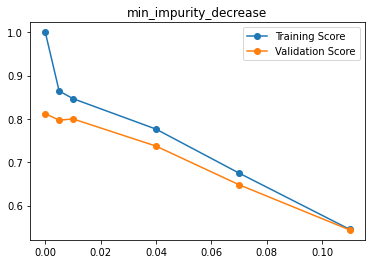

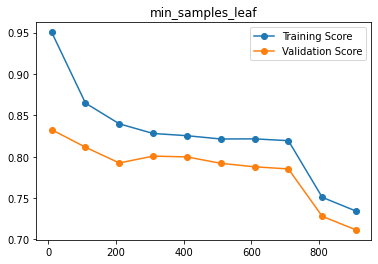

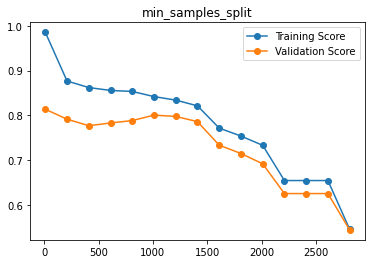

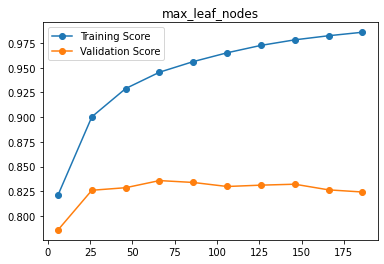

In [ ]:
depthRange = range(3, 16, 3)
impurityDecreaseRange = [0, 0.005, 0.01, 0.04, 0.07, 0.11]
min_samples_leaf = range(10, 1000, 100)
min_samples_split = range(10, 3000, 200)
max_leaf_nodes = range(6, 200, 20)

paramDict = {"max_depth": depthRange, "min_impurity_decrease": impurityDecreaseRange, "min_samples_leaf": min_samples_leaf, 'min_samples_split':min_samples_split, 'max_leaf_nodes': max_leaf_nodes}

tuner = ParameterTuner(x_train, y_train, paramDict)
tuner.plotAll()

In [ ]:
finalDT = tree.DecisionTreeClassifier(max_depth=8, min_samples_leaf=20, min_impurity_decrease=0.001, random_state=0)
finalDT = tree.DecisionTreeClassifier(max_depth=8, min_samples_leaf=15, min_impurity_decrease=0.001, random_state=0)
finalDT = tree.DecisionTreeClassifier(max_depth=8, min_samples_leaf=15, min_impurity_decrease=0.0005, random_state=0)
finalDT = tree.DecisionTreeClassifier(max_depth=8, min_samples_leaf=15, min_impurity_decrease=0.0005, random_state=0)
# finalDT = tree.DecisionTreeClassifier(max_depth=8, min_impurity_decrease=0.0005, random_state=0)
finalDT = tree.DecisionTreeClassifier(max_depth=8, min_samples_leaf=15, min_impurity_decrease=0.0001, max_leaf_nodes=60, random_state=0)
# finalDT = tree.DecisionTreeClassifier(max_depth=8, min_samples_leaf=15, min_impurity_decrease=0.0001, random_state=0)
# finalDT = tree.DecisionTreeClassifier(max_depth=8, min_samples_leaf=15, random_state=0)
# finalDT = tree.DecisionTreeClassifier(max_leaf_nodes=45, random_state=0)
finalDT.fit(x_train, y_train)
print(statistics.mean(cross_val_score(finalDT, x_train, y_train, n_jobs=-1)))

0.8354253897344118


####Grid Search

In [ ]:
model = tree.DecisionTreeClassifier(random_state=0)
depthRange = [6, 8]
impurityDecreaseRange = [0.01, 0.03, 0.05]
min_samples_leaf = range(40, 201, 50)
min_samples_split = range(400, 1201, 400)
max_leaf_nodes = range(20, 40)

paramDict = {"max_depth": depthRange, "min_impurity_decrease": impurityDecreaseRange, "min_samples_leaf": min_samples_leaf, 'min_samples_split':min_samples_split, 'max_leaf_nodes': max_leaf_nodes, 'ccp_alpha': ccp_alphas}

GS = GridSearchCV(model, paramDict, n_jobs=-1)
ans = GS.fit(X, y)
print("max_depth = ", ans.best_params_['max_depth'])
print("min_impurity_decrease = ", ans.best_params_['min_impurity_decrease'])
print("min_samples_leaf = ", ans.best_params_['min_samples_leaf'])

NameError: ignored

###Final Decision Tree after tuning

In [ ]:
finalDT = tree.DecisionTreeClassifier(max_depth=8, min_samples_leaf=15, min_impurity_decrease=0.0001, max_leaf_nodes=60, random_state=0)
finalDT.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=60,
                       min_impurity_decrease=0.0001, min_samples_leaf=15,
                       random_state=0)

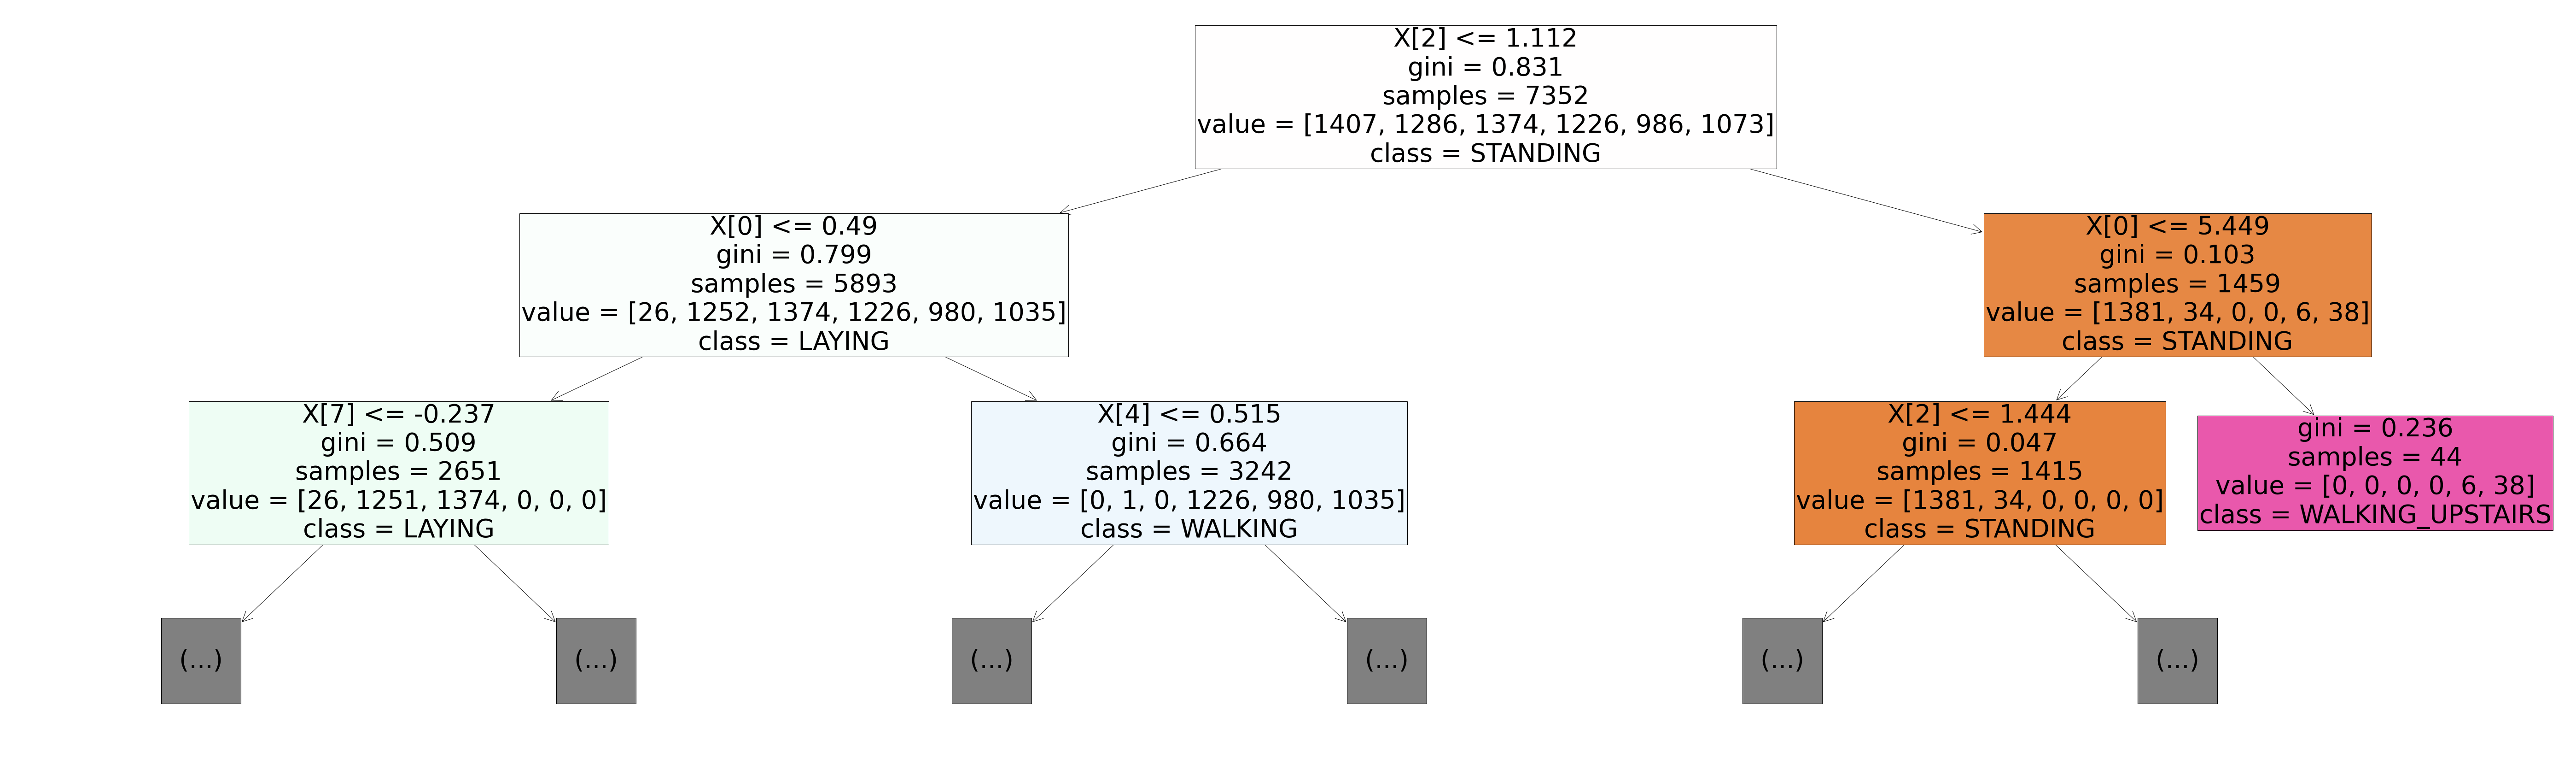

In [ ]:
fig = plt.figure(figsize=(100,30))
_ = tree.plot_tree(finalDT, filled=True, fontsize=55, class_names=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], max_depth=2)

In [ ]:
y_pred = finalDT.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
# should we also plot ROC curve

                    precision    recall  f1-score   support

            LAYING       0.99      0.94      0.96       537
           SITTING       0.73      0.67      0.70       491
          STANDING       0.73      0.83      0.78       532
           WALKING       0.76      0.91      0.83       496
WALKING_DOWNSTAIRS       0.74      0.75      0.74       420
  WALKING_UPSTAIRS       0.89      0.70      0.78       471

          accuracy                           0.80      2947
         macro avg       0.81      0.80      0.80      2947
      weighted avg       0.81      0.80      0.80      2947

0.8035290125551409


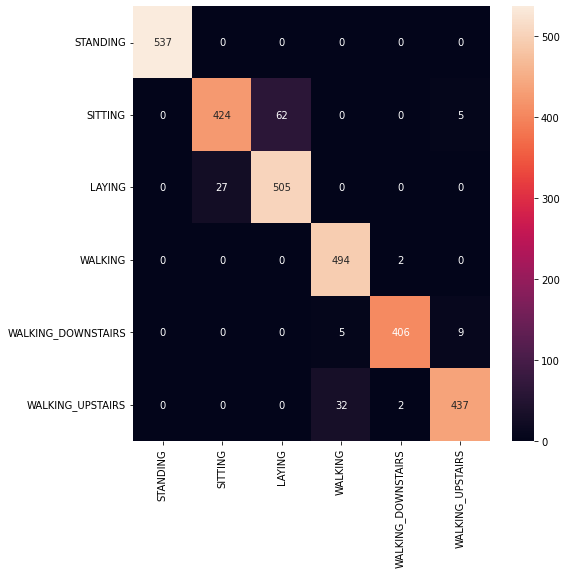

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cf_matrix, annot=True, xticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], yticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], fmt='g')

# Logistic Regression

In [ ]:
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
params = dict(solver=solver_list)
log_reg = LogisticRegression(C=1, n_jobs=-1, random_state=0)
clf = GridSearchCV(log_reg, params, cv=5)
clf.fit(x_train, y_train)
scores = clf.cv_results_['mean_test_score']

for score, solver in zip(scores, solver_list):
    print(f"  {solver} {score:.3f}" )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_log

  liblinear 0.899
  newton-cg 0.902
  lbfgs 0.902
  sag 0.901
  saga 0.900


In [ ]:
lg = LogisticRegression(solver='liblinear', max_iter=5000)

In [ ]:
lg.fit(x_train, y_train)

LogisticRegression(max_iter=5000, solver='liblinear')

In [ ]:
y_pred = lg.predict(x_test)
print(y_pred)

['STANDING' 'STANDING' 'STANDING' ... 'WALKING_UPSTAIRS'
 'WALKING_UPSTAIRS' 'WALKING_UPSTAIRS']


In [ ]:
score=lg.score(x_test, y_test)
print(score)

0.9511367492365117


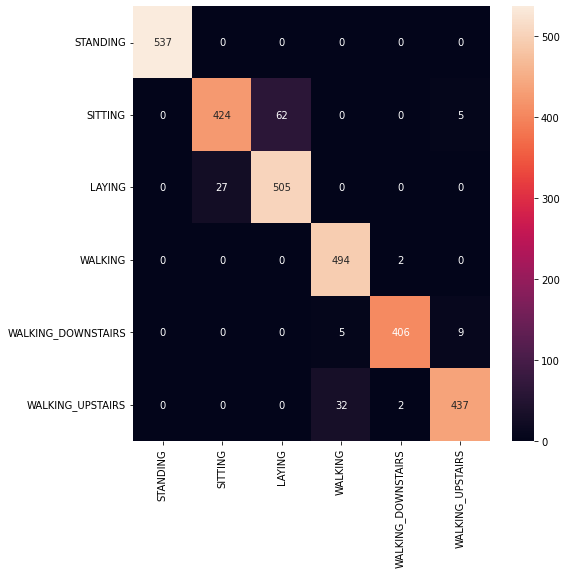

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cf_matrix, annot=True, xticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], yticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], fmt='g')

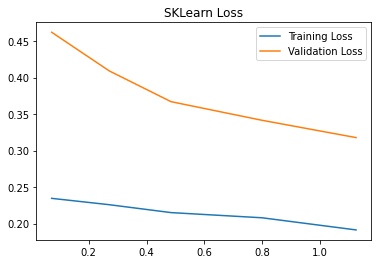

In [ ]:
from sklearn.model_selection import learning_curve
samplesUsed, trainScores, valScores, fit_times, _ = learning_curve(lg, x_train, y_train, scoring='neg_log_loss', n_jobs=-1, return_times=True)

trainScores = np.mean(trainScores, axis=1)*-1
valScores = np.mean(valScores, axis=1)*-1
fit_times = np.mean(fit_times, axis=1)

plt.plot(fit_times, trainScores, label = 'Training Loss')
plt.plot(fit_times, valScores, label = 'Validation Loss')
plt.title("SKLearn Loss")
plt.legend()
plt.show()

# Random Forest

## Criterion

**Gini as criterion**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rfc = RandomForestClassifier(n_estimators=100, random_state=0, bootstrap=True, oob_score=True, criterion='entropy', max_depth=50, max_features='sqrt', n_jobs=-1)
rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)
print(classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cf_matrix, annot=True, xticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], yticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], fmt='g')

**Entropy as criterion**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rfc = RandomForestClassifier(n_estimators=100, random_state=0, bootstrap=True, oob_score=True, criterion='entropy', max_depth=50, max_features='sqrt', n_jobs=-1)
rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)
print(classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cf_matrix, annot=True, xticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], yticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], fmt='g')

##Validation curves

In [ ]:
def plotDoubleLineGraph(x, y1, y2, label1='Training Score', label2='Validation Score', title="SKLearn Score"):
  plt.plot(x, y1, label = label1, marker='o')
  plt.plot(x, y2, label = label2, marker='o')
  plt.title(title)
  plt.legend()
  plt.show()

class ParameterTuner:
  def __init__(self, X, y, paramDict):
    self.paramDict = paramDict
    self.X=X
    self.y=y
    self.trainScores = []
    self.valScores = []
    self.boundedDT = tree.DecisionTreeClassifier(max_depth=15, min_samples_leaf=5, min_impurity_decrease=0.0001, random_state=0)
    self.unboundedDT = tree.DecisionTreeClassifier(random_state=0)
  
  def calcScores(self, parameterName, parameterRange, model):
    trainScores, valScores = validation_curve(model, self.X, self.y, param_name=parameterName, param_range=parameterRange, cv=5, n_jobs=-1)
    self.trainScores = np.mean(trainScores, axis=1)
    self.valScores = np.mean(valScores, axis=1)
    return
    
  def plotScores(self, parameterName, parameterRange, model):
    self.calcScores(parameterName, parameterRange, model)
    plotDoubleLineGraph(parameterRange, self.trainScores, self.valScores, title=parameterName)
    return
  
  def plotAll(self):
    for parameterName, parameterRange in self.paramDict.items():
      self.plotScores(parameterName, parameterRange, self.unboundedDT)
      # self.plotScores(parameterName, parameterRange, self.boundedDT)
      print()


In [ ]:
depthRange = range(5, 300, 50)
n_estimatorsRange = range(5, 400, 50)
featuresRange = range(1, 120, 10)
impurityDecreaseRange = [0, 0.005, 0.01, 0.04]
min_samples_leaf = range(1, 601, 200)
min_samples_split = range(2, 1000, 300)
max_leaf_nodes = range(6, 301, 100)

paramDict = {"n_estimators": n_estimatorsRange, "max_depth": depthRange, "max_features": featuresRange, "min_impurity_decrease": impurityDecreaseRange, "min_samples_leaf": min_samples_leaf, 'min_samples_split':min_samples_split, 'max_leaf_nodes': max_leaf_nodes}

rfc = RandomForestClassifier(n_estimators=50, random_state=0, bootstrap=True, oob_score=True, criterion='entropy', n_jobs=-1)

tuner = ParameterTuner(x_train, y_train, paramDict)
# tuner.plotAll()

In [ ]:
tuner.plotScores('max_depth', depthRange, rfc)

In [ ]:
tuner.plotScores('n_estimators', n_estimatorsRange, rfc)

In [ ]:
tuner.plotScores('max_features', featuresRange, rfc)

In [ ]:
rfc = RandomForestClassifier(n_estimators=50 ,max_depth=150, random_state=0, bootstrap=True, oob_score=True, criterion='entropy', n_jobs=-1)
tuner.plotScores('max_leaf_nodes', [10, 100, 200, 400], rfc)


In [ ]:
tuner.plotScores('min_impurity_decrease', impurityDecreaseRange, rfc)

In [ ]:
min_samples_leaf = range(1, 601, 200)
min_samples_split = range(2, 1000, 300)
rfc = RandomForestClassifier(n_estimators=30 ,max_depth=150, random_state=0, bootstrap=True, oob_score=True, criterion='entropy', n_jobs=-1)
tuner.plotScores('min_samples_leaf', min_samples_leaf, rfc)


In [ ]:
min_samples_split = range(2, 1000, 300)
tuner.plotScores('min_samples_split', min_samples_split, rfc)

##Randomised Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 80).astype(int)),
    'max_features': ['log2', 'sqrt', None],
    'criterion': ['gini', 'entropy']
}

rfc = RandomForestClassifier(random_state = 0)
rfc_rs = RandomizedSearchCV(rfc, param_grid, n_jobs = -1, cv = 3, n_iter = 10, random_state=0)
rfc_rs.fit(x_train, y_train)
print('Best parameters:\n', rfc_rs.best_params_)

y_pred = rfc_rs.predict(x_test)
print(classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cf_matrix, annot=True, xticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], yticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], fmt='g')

##Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {
    'max_depth': [None] + [50],
    'min_impurity_decrease': [0, 0.01],
    'min_samples_leaf': [1, 50],
    'min_samples_split': [2, 100],
    'max_leaf_nodes': [None, 50],
    'max_features': ['sqrt', None],
}

rfc = RandomForestClassifier(random_state = 0, n_estimators=30)
rfc_gs = GridSearchCV(rfc, param_grid, n_jobs = -1, cv = 3)
rfc_gs.fit(x_train, y_train)


Best parameters:
 {'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'min_samples_leaf': 1, 'min_samples_split': 2}
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.89      0.80      0.84       491
          STANDING       0.83      0.91      0.87       532
           WALKING       0.87      0.92      0.89       496
WALKING_DOWNSTAIRS       0.92      0.87      0.89       420
  WALKING_UPSTAIRS       0.88      0.87      0.87       471

          accuracy                           0.90      2947
         macro avg       0.90      0.89      0.89      2947
      weighted avg       0.90      0.90      0.90      2947



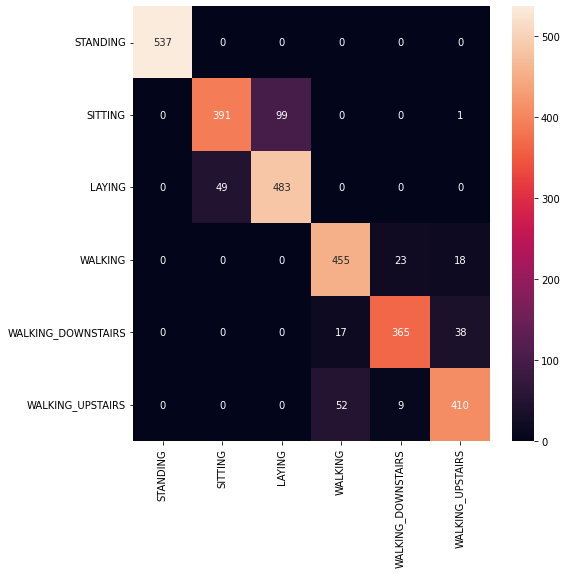

In [ ]:
print('Best parameters:\n', rfc_gs.best_params_)

y_pred = rfc_gs.predict(x_test)
print(classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cf_matrix, annot=True, xticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], yticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], fmt='g')

##Final RF

In [ ]:
rfc = RandomForestClassifier(random_state=0, n_estimators=184, bootstrap=True, oob_score=True, criterion='entropy', n_jobs=-1, max_features='sqrt', max_depth=23)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))



                    precision    recall  f1-score   support

            LAYING       0.99      1.00      0.99       537
           SITTING       0.91      0.82      0.86       491
          STANDING       0.86      0.92      0.89       532
           WALKING       0.89      0.97      0.93       496
WALKING_DOWNSTAIRS       0.93      0.85      0.89       420
  WALKING_UPSTAIRS       0.94      0.92      0.93       471

          accuracy                           0.92      2947
         macro avg       0.92      0.91      0.92      2947
      weighted avg       0.92      0.92      0.92      2947

0.9172039362063115


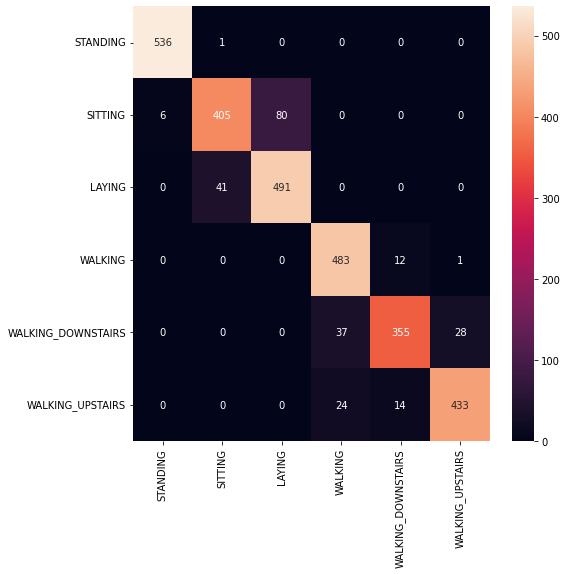

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cf_matrix, annot=True, xticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], yticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], fmt='g')

#AdaBoost

##HyperParameter Tuning

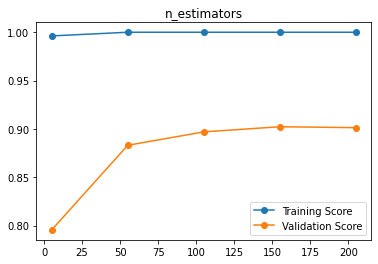

In [ ]:
def plotDoubleLineGraph(x, y1, y2, label1='Training Score', label2='Validation Score', title="SKLearn Score"):
  plt.plot(x, y1, label = label1, marker='o')
  plt.plot(x, y2, label = label2, marker='o')
  plt.title(title)
  plt.legend()
  plt.show()

class ParameterTuner:
  def __init__(self, X, y, paramDict):
    self.paramDict = paramDict
    self.X=X
    self.y=y
    self.trainScores = []
    self.valScores = []
    self.boundedDT = tree.DecisionTreeClassifier(max_depth=10)
    self.unboundedDT = tree.DecisionTreeClassifier(random_state=0)
  
  def calcScores(self, parameterName, parameterRange, model):
    trainScores, valScores = validation_curve(model, self.X, self.y, param_name=parameterName, param_range=parameterRange, cv=5, n_jobs=-1)
    self.trainScores = np.mean(trainScores, axis=1)
    self.valScores = np.mean(valScores, axis=1)
    return
    
  def plotScores(self, parameterName, parameterRange, model):
    self.calcScores(parameterName, parameterRange, model)
    plotDoubleLineGraph(parameterRange, self.trainScores, self.valScores, title=parameterName)
    return
  
  def plotAll(self):
    for parameterName, parameterRange in self.paramDict.items():
      # self.plotScores(parameterName, parameterRange, AdaBoostClassifier(base_estimator=self.unboundedDT))
      self.plotScores(parameterName, parameterRange,  AdaBoostClassifier(base_estimator=self.boundedDT))
      print()

n_estimatorsRange = range(5, 206, 50)
paramDict = {"n_estimators": n_estimatorsRange}
tuner = ParameterTuner(x_train, y_train, paramDict)
tuner.plotAll()

We keep n_estimators = 50 (default)

In [ ]:
depthRange = [3, 9, 15, 20]

baseEstimator = []
scores = []

for depth in depthRange:
  print(depth)
  baseClf = DecisionTreeClassifier(random_state=0, max_depth=depth)
  abc = AdaBoostClassifier(base_estimator=baseClf, random_state=0)
  scores.append(statistics.mean(cross_val_score(abc, x_train, y_train, n_jobs=-1)))

3
9
15
20


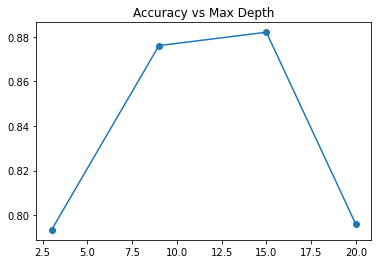

In [ ]:
plt.plot(depthRange, scores, marker='o')
plt.title("Accuracy vs Max Depth")
plt.show()


##Final AB

In [ ]:
baseDT = DecisionTreeClassifier(random_state=0, max_depth=15)
abc = AdaBoostClassifier(base_estimator=baseDT, random_state=0)
abc.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=15,
                                                         random_state=0),
                   random_state=0)

In [ ]:
y_pred = abc.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       0.99      0.99      0.99       537
           SITTING       0.90      0.84      0.86       491
          STANDING       0.86      0.92      0.89       532
           WALKING       0.86      0.96      0.91       496
WALKING_DOWNSTAIRS       0.89      0.81      0.85       420
  WALKING_UPSTAIRS       0.93      0.90      0.91       471

          accuracy                           0.91      2947
         macro avg       0.91      0.90      0.90      2947
      weighted avg       0.91      0.91      0.91      2947

0.9056667797760435


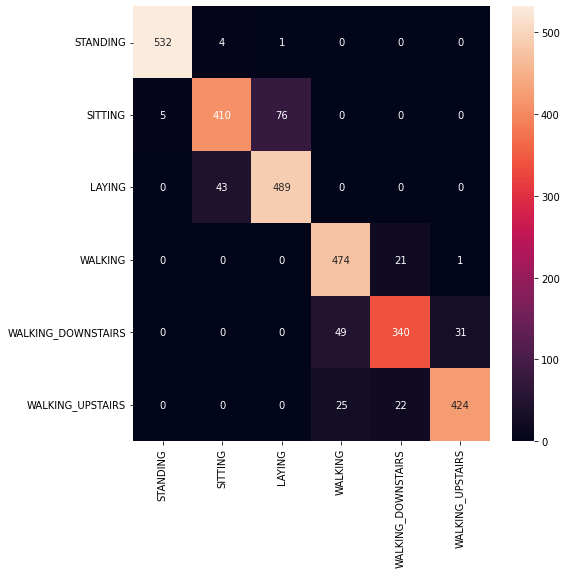

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cf_matrix, annot=True, xticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], yticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], fmt='g')

#SVM

In [ ]:
svc = SVC(random_state=0)
svc.fit(x_train, y_train)


SVC(random_state=0)

In [ ]:
y_pred = svc.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9477434679334917
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.94      0.89      0.92       491
          STANDING       0.91      0.95      0.93       532
           WALKING       0.95      0.97      0.96       496
WALKING_DOWNSTAIRS       0.98      0.90      0.94       420
  WALKING_UPSTAIRS       0.91      0.96      0.93       471

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



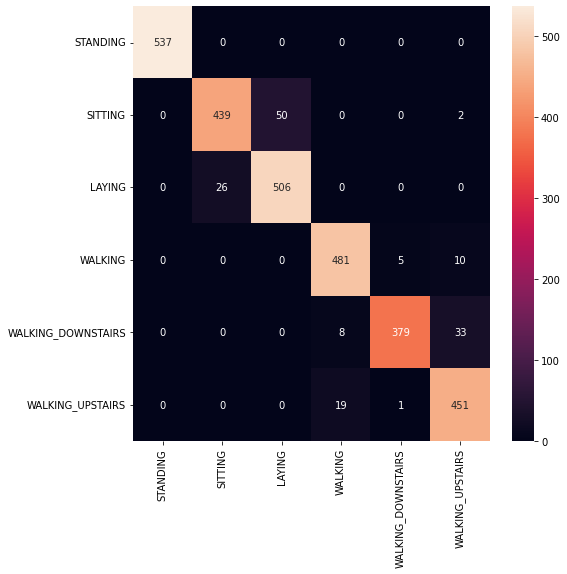

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cf_matrix, annot=True, xticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], yticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], fmt='g')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf'],
    'degree': [1, 2, 3, 4, 5]
}

svc = SVC(random_state=0)
svc_gs = GridSearchCV(svc, param_grid, n_jobs = -1, cv = 3)
svc_gs.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=SVC(random_state=0), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'degree': [1, 2, 3, 4, 5],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

Best parameters:
 {'C': 1000, 'degree': 1, 'gamma': 0.01, 'kernel': 'rbf'}
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.89      0.93       491
          STANDING       0.91      0.97      0.94       532
           WALKING       0.95      0.97      0.96       496
WALKING_DOWNSTAIRS       0.98      0.94      0.96       420
  WALKING_UPSTAIRS       0.93      0.95      0.94       471

          accuracy                           0.95      2947
         macro avg       0.96      0.95      0.95      2947
      weighted avg       0.96      0.95      0.95      2947



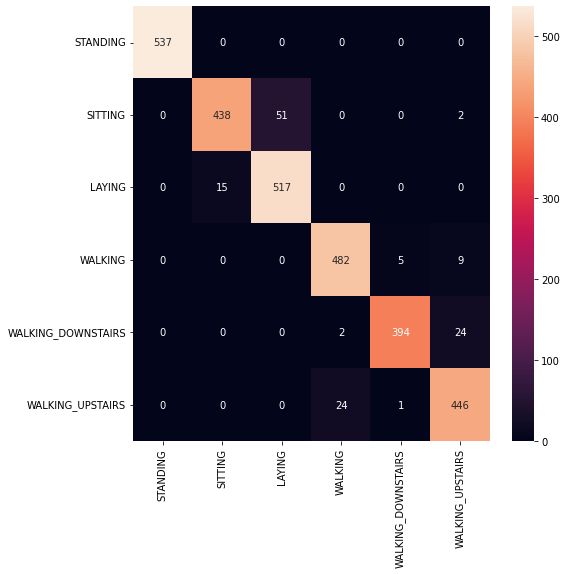

In [ ]:
print('Best parameters:\n', svc_gs.best_params_)

y_pred = svc_gs.predict(x_test)
print(classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cf_matrix, annot=True, xticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], yticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], fmt='g')

##Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = [
    {
        'C': [0.1, 1, 10, 100, 1000],
        'kernel': ['linear']
    },
    {
        'C': [0.1, 1, 10, 100, 1000],
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
        'kernel': ['rbf']
    },
    {
        'C': [0.1, 1, 10, 100, 1000],
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
        'kernel': ['poly'],
        'degree': [0, 1, 2, 3, 4, 5]
    }
]

svc = SVC(random_state=0)
svc_gs = GridSearchCV(svc, param_grid, n_jobs = -1, cv = 3)
svc_gs.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=SVC(random_state=0), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'degree': [0, 1, 2, 3, 4, 5],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['poly']}])

Best parameters:
 {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
0.9548693586698337
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.89      0.93       491
          STANDING       0.91      0.97      0.94       532
           WALKING       0.95      0.97      0.96       496
WALKING_DOWNSTAIRS       0.98      0.94      0.96       420
  WALKING_UPSTAIRS       0.93      0.95      0.94       471

          accuracy                           0.95      2947
         macro avg       0.96      0.95      0.95      2947
      weighted avg       0.96      0.95      0.95      2947



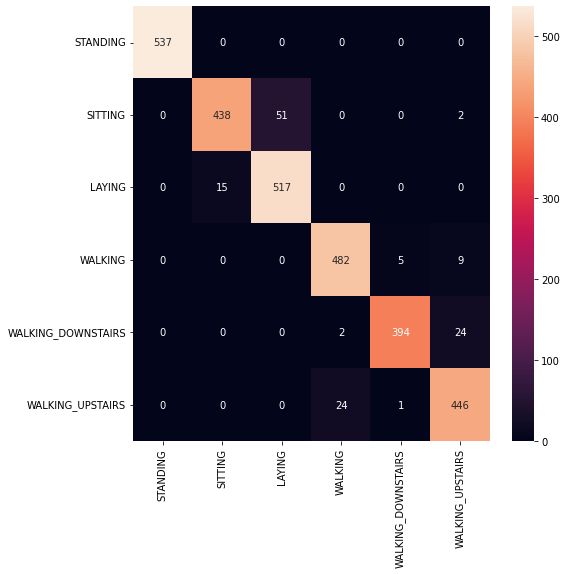

In [ ]:
print('Best parameters:\n', svc_gs.best_params_)

y_pred = svc_gs.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cf_matrix, annot=True, xticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], yticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], fmt='g')

##Final SVM

In [ ]:
svc = SVC(random_state=0, C=1000, degree=1, gamma=0.01, kernel='rbf')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.89      0.93       491
          STANDING       0.91      0.97      0.94       532
           WALKING       0.94      0.97      0.96       496
WALKING_DOWNSTAIRS       0.98      0.93      0.95       420
  WALKING_UPSTAIRS       0.93      0.94      0.93       471

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947

0.9531727180183237


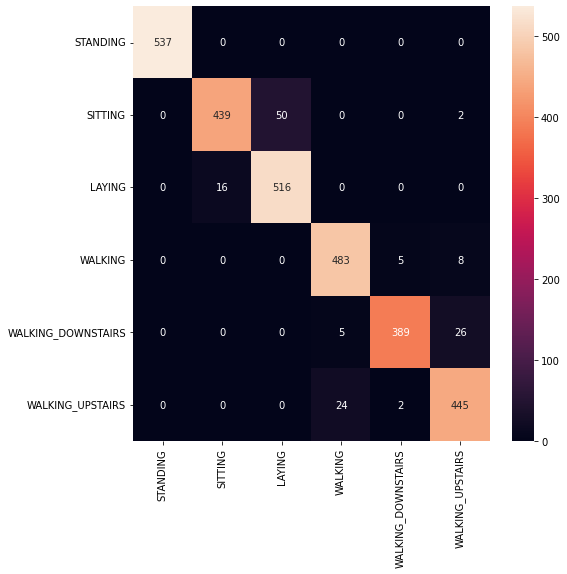

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cf_matrix, annot=True, xticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], yticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], fmt='g')

#MLP

In [ ]:
hidden_layers = [60]
mlp = MLPClassifier(hidden_layer_sizes=hidden_layers, random_state=0)
mlp.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=[60], random_state=0)

In [ ]:
y_pred = mlp.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      0.97      0.98       537
           SITTING       0.95      0.88      0.91       491
          STANDING       0.87      0.96      0.91       532
           WALKING       0.93      1.00      0.96       496
WALKING_DOWNSTAIRS       0.99      0.96      0.97       420
  WALKING_UPSTAIRS       0.96      0.93      0.95       471

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



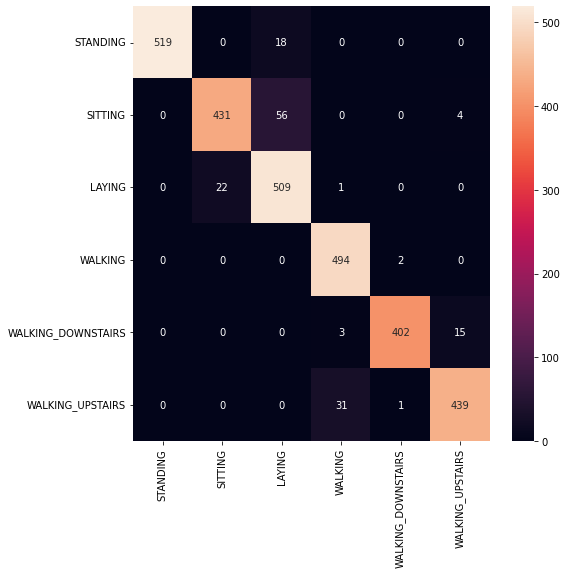

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cf_matrix, annot=True, xticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], yticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], fmt='g')

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}


In [ ]:
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
clf.fit(x_train, y_train)


Best parameters:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
                    precision    recall  f1-score   support

            LAYING       1.00      0.96      0.98       537
           SITTING       0.95      0.88      0.92       491
          STANDING       0.87      0.96      0.92       532
           WALKING       0.94      0.99      0.96       496
WALKING_DOWNSTAIRS       0.99      0.97      0.98       420
  WALKING_UPSTAIRS       0.97      0.94      0.95       471

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



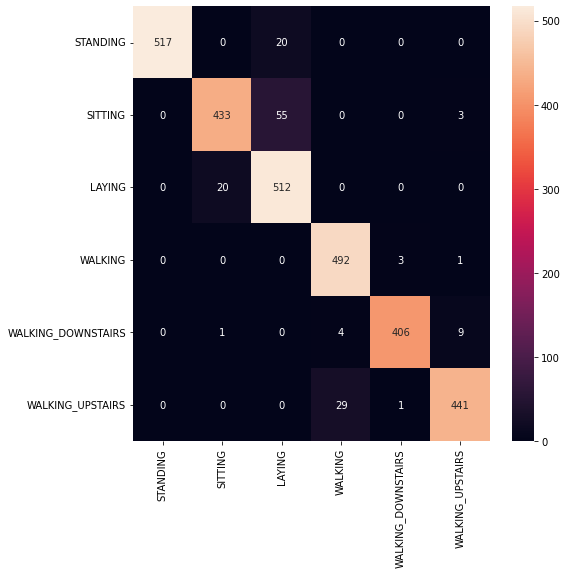

In [ ]:
print('Best parameters:\n', clf.best_params_)

y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

print(accuracy_score(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cf_matrix, annot=True, xticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], yticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], fmt='g')

##Final MLP

In [ ]:
mlp = MLPClassifier(activation= 'tanh', alpha= 0.0001, hidden_layer_sizes= (100,), learning_rate= 'constant', solver= 'adam', random_state=0)
mlp.fit(x_train, y_train)

MLPClassifier(activation='tanh', random_state=0)

In [ ]:
y_pred = mlp.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      0.97      0.98       537
           SITTING       0.95      0.88      0.91       491
          STANDING       0.87      0.96      0.91       532
           WALKING       0.93      1.00      0.96       496
WALKING_DOWNSTAIRS       1.00      0.96      0.98       420
  WALKING_UPSTAIRS       0.97      0.93      0.95       471

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947

0.9501187648456056


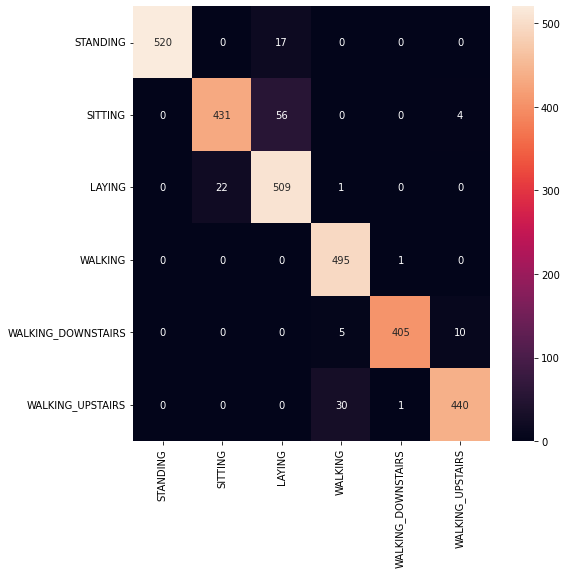

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cf_matrix, annot=True, xticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], yticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], fmt='g')

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred=knn.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.90      0.72      0.80       491
          STANDING       0.79      0.93      0.85       532
           WALKING       0.85      0.95      0.89       496
WALKING_DOWNSTAIRS       0.93      0.80      0.86       420
  WALKING_UPSTAIRS       0.87      0.87      0.87       471

          accuracy                           0.88      2947
         macro avg       0.89      0.88      0.88      2947
      weighted avg       0.89      0.88      0.88      2947

0.8825924669155073


In [ ]:
leaf_size = [3, 4, 5, 6, 7]
n_neighbors = [5, 6, 7, 8, 9]
p=[1,2]

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

knn = KNeighborsClassifier()

clf = GridSearchCV(knn, hyperparameters, cv=10)
clf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [3, 4, 5, 6, 7],
                         'n_neighbors': [5, 6, 7, 8, 9], 'p': [1, 2]})

In [ ]:
print('Best leaf_size:', clf.best_estimator_.get_params()['leaf_size'])
print('Best p:', clf.best_estimator_.get_params()['p'])
print('Best n_neighbors:', clf.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 3
Best p: 1
Best n_neighbors: 8


In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.89      0.76      0.82       491
          STANDING       0.81      0.91      0.86       532
           WALKING       0.85      0.98      0.91       496
WALKING_DOWNSTAIRS       0.96      0.83      0.89       420
  WALKING_UPSTAIRS       0.89      0.85      0.87       471

          accuracy                           0.89      2947
         macro avg       0.90      0.89      0.89      2947
      weighted avg       0.90      0.89      0.89      2947

0.8914149983033594


##Final KNN

In [ ]:
knn = KNeighborsClassifier(leaf_size=3, p=1, n_neighbors=8)
knn.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=3, n_neighbors=8, p=1)

In [ ]:
y_pred=knn.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      0.99      0.99       537
           SITTING       0.90      0.83      0.86       491
          STANDING       0.85      0.92      0.88       532
           WALKING       0.84      0.99      0.91       496
WALKING_DOWNSTAIRS       0.97      0.80      0.88       420
  WALKING_UPSTAIRS       0.91      0.89      0.90       471

          accuracy                           0.91      2947
         macro avg       0.91      0.90      0.90      2947
      weighted avg       0.91      0.91      0.91      2947

0.9060061079063454


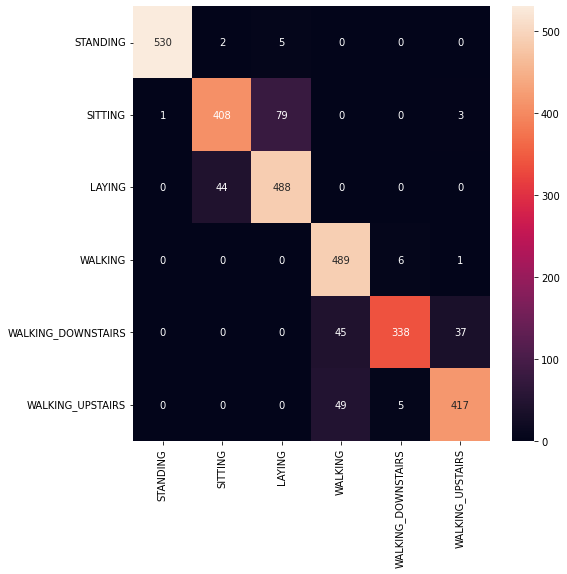

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cf_matrix, annot=True, xticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], yticklabels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], fmt='g')